In [1]:
from polypy import Read as rd
from polypy import Density as Dens
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timestep = 0.25
data = rd.read_history("../../../OLD/data/HIST", ["U", "O"])

In [3]:
total_density = Dens.Density(data)
ca_density = Dens.Density(data, atom_type="U")
f_density = Dens.Density(data, atom_type="O")


bin_volume=(0.1 * np.mean(data['lv'][:,0] * np.mean(data['lv'][:,1])))

This is the Number density of Uranium followed by the number density of oxygen in one direction of a simple fluorite lattice.

16.685000000000002 33.35


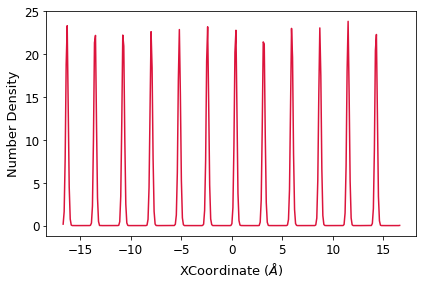

16.685000000000002 33.225


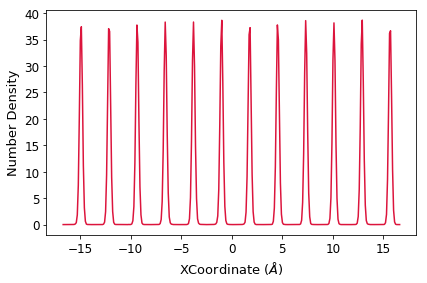

In [4]:
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="z")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="z")

## Charge Density

\begin{align}
\rho_q(z) & = \sum q_i \rho_i (z) ,
\end{align}



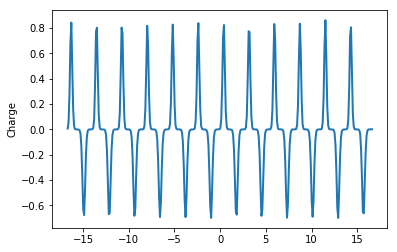

In [5]:
charge_density = ((4 * cy) + (-2 * fy)) / bin_volume

plt.plot(fx, charge_density, lw=2)
plt.ylabel("Charge")
plt.show()

## Electric Field

\begin{align}
E(z) & = \frac{1}{- \epsilon_0} \int\limits_z^z \rho_q(z)dz
\end{align}

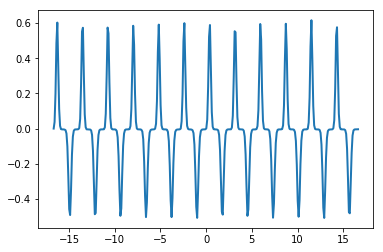

In [6]:
electric_field = np.array([0.0])

for i in range(1, charge_density.size):
    e = ((charge_density[i] - charge_density[i-1]) * 0.5 * (fx[i] - fx[i-1])) * 14.3997584 + electric_field[i-1]
    electric_field = np.append(electric_field, e)
    
plt.plot(fx, electric_field, lw=2)
plt.show()

## Electrostatic Potential

\begin{align}
\Phi(z) & = -\int\limits_z^z E(z)dz
\end{align}

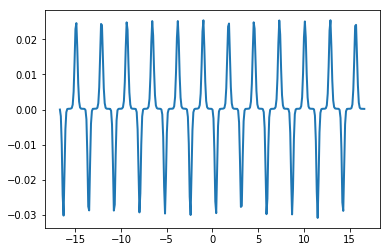

In [8]:
potential = np.array([0.0])

for i in range(1, electric_field.size):
    p = -(electric_field[i] - electric_field[i-1]) * 0.5 * (fx[i] - fx[i-1]) + potential[i-1]
    potential = np.append(potential, p)
    
plt.plot(fx, potential, lw=2)
plt.show()